In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [5]:
df=pd.read_csv('c:/data/ozone/ozone2.csv')
print(df.head())

   Unnamed: 0     Ozone  Unnamed: 2     Solar.R  Wind  Temp  result
0        41.0  41.00000       190.0  190.000000   7.4    67       0
1        36.0  36.00000       118.0  118.000000   8.0    72       0
2        12.0  12.00000       149.0  149.000000  12.6    74       0
3        18.0  18.00000       313.0  313.000000  11.5    62       0
4         NaN  42.12931         NaN  185.931507  14.3    56       1


In [6]:
df.columns

Index(['Unnamed: 0', 'Ozone', 'Unnamed: 2', 'Solar.R', 'Wind', 'Temp',
       'result'],
      dtype='object')

In [7]:
df.shape

(153, 7)

In [8]:
df.describe()

,Unnamed: 0,Ozone,Unnamed: 2,Solar.R,Wind,Temp,result
count,116.000000,153.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,42.129310,185.931507,185.931507,9.957516,77.882353,0.529412
std,32.987885,28.693372,90.058422,87.960267,3.523001,9.465270,0.500773
min,1.000000,1.000000,7.000000,7.000000,1.700000,56.000000,0.000000
25%,18.000000,21.000000,115.750000,120.000000,7.400000,72.000000,0.000000
50%,31.500000,42.129310,205.000000,194.000000,9.700000,79.000000,1.000000
75%,63.250000,46.000000,258.750000,256.000000,11.500000,85.000000,1.000000
max,168.000000,168.000000,334.000000,334.000000,20.700000,97.000000,1.000000


In [9]:
df.groupby("result").mean()

,Unnamed: 0,Ozone,Unnamed: 2,Solar.R,Wind,Temp
result,,,,,,
0,20.902778,20.902778,165.449275,166.302702,11.270833,72.652778
1,76.863636,60.997339,204.285714,203.379334,8.790123,82.530864


Text(0, 0.5, '빈도')

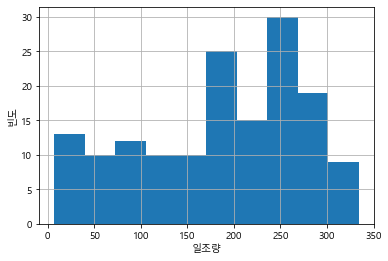

In [10]:
df["Solar.R"].hist()
plt.xlabel('일조량') 
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

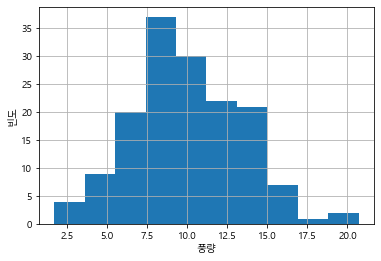

In [11]:
df["Wind"].hist()
plt.xlabel('풍량') 
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

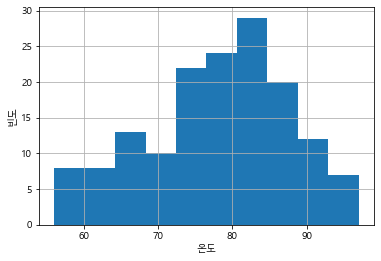

In [12]:
df["Temp"].hist()
plt.xlabel('온도') 
plt.ylabel('빈도')

In [13]:
df["result"].value_counts()

1    81
0    72
Name: result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0:부족|| 1:정상)')

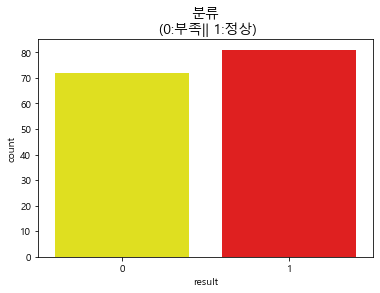

In [14]:
import seaborn as sns
colors=["yellow",'red']
sns.countplot('result', data=df, palette=colors)
plt.title('분류\n (0:부족|| 1:정상)', fontsize=14)

In [15]:
from imblearn.under_sampling import RandomUnderSampler

cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['result']

X_sample,y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['result'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [16]:
from imblearn.over_sampling import SMOTE

cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['result']

X_sample,y_sample=SMOTE(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample,columns=cols)
y_samp=pd.DataFrame(data=y_sample,columns=['result'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [17]:
df2['result'].value_counts()

0    81
1    81
Name: result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0:부족|| 1:정상)')

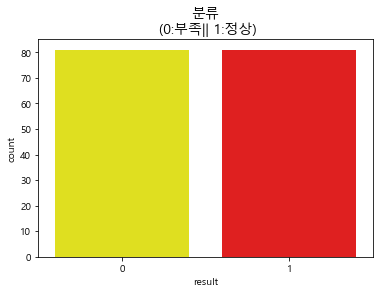

In [18]:
colors=["yellow",'red']
sns.countplot('result', data=df2, palette=colors)
plt.title('분류\n (0:부족|| 1:정상)', fontsize=14)

In [19]:
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['result']

In [20]:
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.572473
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.172     
Dependent Variable: result           AIC:              181.1767  
Date:               2021-12-07 16:02 BIC:              190.2680  
No. Observations:   153              Log-Likelihood:   -87.588   
Df Model:           2                LL-Null:          -105.79   
Df Residuals:       150              LLR p-value:      1.2490e-08
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Solar.R    0.0031     0.0021    1.4453   0.1484   -0.0011    0.0073
Wind      -0.2695     0.0543   -4.9647   0.0000   -0.3758 

In [22]:
cols=['Wind', 'Temp']
X=X_samp[cols]
y=y_samp['result']
df2=pd.concat([X,y],axis=1)

In [23]:
model=sm.Logit(y,X)
result=model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.587764
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.152     
Dependent Variable: result           AIC:              194.4356  
Date:               2021-12-07 16:02 BIC:              200.6108  
No. Observations:   162              Log-Likelihood:   -95.218   
Df Model:           1                LL-Null:          -112.29   
Df Residuals:       160              LLR p-value:      5.1178e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Wind      -0.2610     0.0523   -4.9950   0.0000   -0.3635   -0.1586
Temp       0.0342     0.0069    4.9515   0.0000    0.0206 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
print("학습용:",model.score(X_train, y_train)) 
print("검증용:",model.score(X_test, y_test))

학습용: 0.8217054263565892
검증용: 0.5757575757575758


In [27]:
from sklearn.metrics import confusion_matrix

pred=model.predict(X_test)

cm=confusion_matrix(y_test, pred)
cm

array([[ 7,  7],
       [ 7, 12]], dtype=int64)

In [28]:
df_cm=pd.DataFrame(cm, index=[0, 1],columns=[0, 1])
df_cm

,0,1
0,7,7
1,7,12


<AxesSubplot:title={'center':'Confusion Matrix'}>

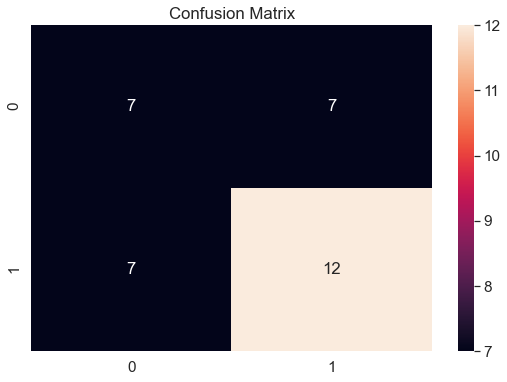

In [30]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)